In [1]:
import pyLIMA

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import csv

from pyLIMA.fits import DE_fit
from pyLIMA.fits import TRF_fit
from pyLIMA.models import PSPL_model
from pyLIMA.models import USBL_model, pyLIMA_fancy_parameters
from pyLIMA.outputs import pyLIMA_plots

from pyLIMA import event
from pyLIMA import telescopes

In [3]:
your_event = event.Event(ra=262.75616,dec=-21.40123)
your_event.name = 'Gaia21bsg'

In [4]:
data_1 = np.loadtxt('data/star_20957_Gaia21bsg_fs01_ip_reduced.dat')
telescope_1 = telescopes.Telescope(name='Gaia_20957_i',
                                  camera_filter = 'I',
                                  light_curve = data_1.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_2 = np.loadtxt('data/star_50085_Gaia21bsg_gp_reduced.dat')
telescope_2 = telescopes.Telescope(name='Gaia__50085_g',
                                  camera_filter = 'G',
                                  light_curve = data_2.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_3 = np.loadtxt('data/star_79874_Gaia21bsg_ip_reduced.dat')
telescope_3 = telescopes.Telescope(name='Gaia_79874_i',
                                  camera_filter = 'I',
                                  light_curve = data_3.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_3[:,0],data_3[:,1])

In [5]:
data_4 = np.loadtxt('data/atlas_c_filter.dat')
data_4[:,0] = data_4[:,0] + 2.4e6
telescope_4 = telescopes.Telescope(name='ATLAS_c',
                                  camera_filter = 'C',
                                  light_curve = data_4.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [6]:
#plt.plot(data_4[:,0],data_4[:,1],'o')

In [7]:
data_5 = np.loadtxt('data/atlas_o_filter.dat')
data_5[:,0] = data_5[:,0] + 2.4e6
telescope_5 = telescopes.Telescope(name='ATLAS_o',
                                  camera_filter = 'O',
                                  light_curve = data_5.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [8]:
#plt.plot(data_4[:,0],data_4[:,1])

In [9]:
data_6 = np.loadtxt('data/ztf_gaiabsg21_reduced.dat')
data_6[:,0] = data_6[:,0] + 2.4e6
telescope_6 = telescopes.Telescope(name='ZTF_r',
                                  camera_filter = 'R',
                                  light_curve = data_6.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [10]:
#plt.plot(data_5[:,0],data_5[:,1])

# object id found via ztf: 281216400001763

In [11]:
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)
your_event.telescopes.append(telescope_3)
your_event.telescopes.append(telescope_4)
your_event.telescopes.append(telescope_5)
your_event.telescopes.append(telescope_6)

In [12]:
your_event.find_survey('Gaia')

In [13]:
your_event.check_event()

check_event  : Everything looks fine...


In [14]:
from pyLIMA.models import PSPL_model
pspl = PSPL_model.PSPLmodel(your_event)

In [15]:
from pyLIMA.fits import DE_fit

In [16]:
my_fit = DE_fit.DEfit(pspl)

In [17]:
my_fit.fit_parameters

OrderedDict([('t0', [0, (2458246.4171181, 2460119.920427)]),
             ('u0', [1, (0.0, 1.0)]),
             ('tE', [2, (0.1, 500)])])

In [18]:
my_fit.fit()

DE converge to objective function : f(x) =  73772.38217576982
DE converge to parameters : =  ['2459353.870407582' '0.9990147367647948' '1.1263635930928615']
fit  : Differential Evolution fit SUCCESS
best_model: [2.45935387e+06 9.99014737e-01 1.12636359e+00] -ln(likelihood) 73772.38217576982


In [19]:
my_fit.fit_results

{'best_model': array([2.45935387e+06, 9.99014737e-01, 1.12636359e+00]),
 '-(ln_likelihood)': 73772.38217576982,
 'fit_time': 8.50080156326294,
 'DE_population': array([[ 2.45902488e+06,  4.64693813e-01,  1.79118487e+02, ...,
         -1.68671471e+02,  1.48143794e+03,  1.55448404e+05],
        [ 2.45931963e+06,  1.42982488e-01,  3.07629990e+02, ...,
          3.61637590e+02,  8.40367251e+02,  1.53655469e+05],
        [ 2.45870236e+06,  9.93410046e-01,  2.36948555e+02, ...,
         -9.25794724e+02,  2.47004768e+03,  1.54080829e+05],
        ...,
        [ 2.45935387e+06,  9.99000943e-01,  1.12196523e+00, ...,
          3.05765675e+05, -3.04476219e+05,  7.37728321e+04],
        [ 2.45935388e+06,  9.97895649e-01,  1.12445239e+00, ...,
          3.01432325e+05, -3.00142839e+05,  7.37749801e+04],
        [ 2.45935387e+06,  8.38730396e-01,  1.12667588e+00, ...,
          2.92236960e+05, -2.90947496e+05,  7.42009004e+04]])}

In [20]:
my_fit.fit_results['best_model']

array([2.45935387e+06, 9.99014737e-01, 1.12636359e+00])

In [21]:
my_fit.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE'])

<IPython.core.display.Javascript object>


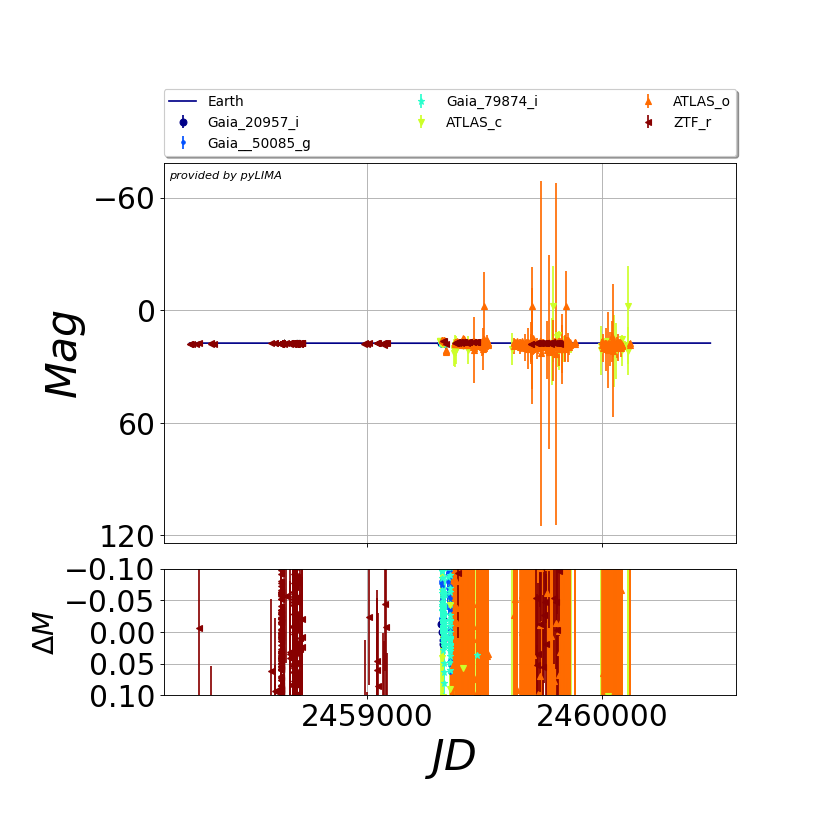

/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1017: RuntimeWarning: invalid value encountered in log10
  np.log10(ref_source * magni + ref_blend)
/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1112: RuntimeWarning: invalid value encountered in log10
  np.log10(model_flux)


In [22]:
from pyLIMA.outputs import pyLIMA_plots
pyLIMA_plots.plot_lightcurves(pspl,my_fit.fit_results['best_model'])
plt.show()

In [23]:
from pyLIMA.fits import LM_fit

In [24]:
my_fit2 = LM_fit.LMfit(pspl)

In [25]:
my_fit2.fit()

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2459351.9347958067, 1.0, 25.87142560770735, 8967.818203053135, 0.0, 555.7292324338752, 0.0, 2883.891295418017, 0.0, 91201083935.59077, 9940.47901991431, 32509.679191049916, -31800.991053190766, 5764.557824945484, 0.0]
fit  : Levenberg-Marquardt fit SUCCESS
best_model: [2459344.779533648, 0.006872460218834686, 2116.753788260353, -156.2891546993812, 20881.029068056367, 1.057505253874816, 196.6530331848322, 5.232175122689778, 862.2918316027717, -1.9881892685654066, 1288.505514613205, 27.7028230928703, 503.7513392755835, 18.981454923571906, 1168.1343202177027]  chi2: 260224.29925700303


In [26]:
my_fit2.fit_results

{'best_model': [2459344.779533648,
  0.006872460218834686,
  2116.753788260353,
  -156.2891546993812,
  20881.029068056367,
  1.057505253874816,
  196.6530331848322,
  5.232175122689778,
  862.2918316027717,
  -1.9881892685654066,
  1288.505514613205,
  27.7028230928703,
  503.7513392755835,
  18.981454923571906,
  1168.1343202177027],
 'chi2': 260224.29925700303,
 'fit_time': 1.9668161869049072,
 'covariance_matrix': array([[ 1.15441127e+00,  3.33310896e-04,  6.14845626e-01,
         -7.93575046e+00, -9.93133892e-02,  7.40042754e-03,
          1.78614327e+00,  2.59394672e-02,  1.25249538e+01,
         -2.77068513e-02,  8.23066313e-01,  4.30221213e-01,
         -8.85647877e+00,  3.38114077e-01, -2.03803015e+00],
        [ 3.33310896e-04,  1.00399069e-06,  7.49687820e-04,
         -8.46022082e-03, -1.20180541e-04,  1.96068006e-04,
         -1.00514015e-02,  9.43104261e-04, -4.83544488e-02,
         -1.58041194e-04,  2.91375857e-03,  2.37305381e-03,
         -2.69873450e-02,  1.42843937e

In [27]:
my_fit2.fit_results['best_model']

[2459344.779533648,
 0.006872460218834686,
 2116.753788260353,
 -156.2891546993812,
 20881.029068056367,
 1.057505253874816,
 196.6530331848322,
 5.232175122689778,
 862.2918316027717,
 -1.9881892685654066,
 1288.505514613205,
 27.7028230928703,
 503.7513392755835,
 18.981454923571906,
 1168.1343202177027]

In [28]:
my_fit2.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE', 'fsource_Gaia_20957_i', 'fblend_Gaia_20957_i', 'fsource_Gaia__50085_g', 'fblend_Gaia__50085_g', 'fsource_Gaia_79874_i', 'fblend_Gaia_79874_i', 'fsource_ATLAS_c', 'fblend_ATLAS_c', 'fsource_ATLAS_o', 'fblend_ATLAS_o', 'fsource_ZTF_r', 'fblend_ZTF_r'])

<IPython.core.display.Javascript object>


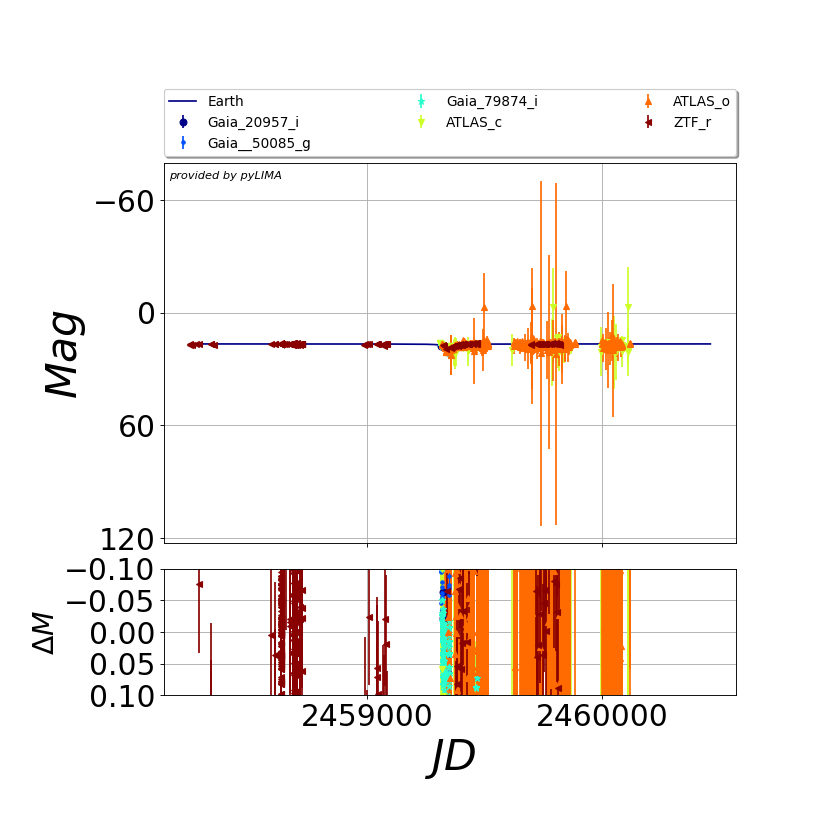

/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1017: RuntimeWarning: invalid value encountered in log10
  np.log10(ref_source * magni + ref_blend)
/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1112: RuntimeWarning: invalid value encountered in log10
  np.log10(model_flux)


In [29]:
pyLIMA_plots.plot_lightcurves(pspl,my_fit2.fit_results['best_model'])
plt.savefig('output1.png')
plt.show()